# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [1]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
  0% 0.00/5.21M [00:00<?, ?B/s]
100% 5.21M/5.21M [00:00<00:00, 116MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_Occupation/

## Import Libraries

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout,Rescaling
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from google.colab import files
import os
from sklearn.model_selection import train_test_split

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [6]:
base_dir = '/content/ParkingLot_Occupation'

In [ ]:
# I use the resizing the image in one code in the section below (Data Splitting)

In [ ]:
# I use the reNormalizing pixel values of  the image in one code in the section below (Building the CNN Model)

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [30]:
train = image_dataset_from_directory(
    '/content/ParkingLot_Occupation/train',
    validation_split=0.15,
    # shuffle=True,
    subset="training",
    seed=123,
    image_size=(128, 128)
)

Found 1382 files belonging to 2 classes.
Using 1175 files for training.


In [31]:
val = image_dataset_from_directory(
    '/content/ParkingLot_Occupation/train',
    validation_split=0.15,
    # shuffle=True,
    subset="validation",
    seed=123,
    image_size=(128, 128)
)

Found 1382 files belonging to 2 classes.
Using 207 files for validation.


In [32]:
test = image_dataset_from_directory(
    '/content/ParkingLot_Occupation/test',
    seed=123,
    image_size=(128, 128)
)

Found 344 files belonging to 2 classes.


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [11]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=(64, 64, 3)))

model.add(Conv2D(12,(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(20,(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=6, activation='relu'))

model.add(Dense(units=12, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 62, 62, 12)          │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 20)          │           2,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │          23,526 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,139 (102.11 KB)

 Trainable params: 26,139 (102.11 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# second way DON't RUN THIS code if you run the above one
model = Sequential()
model.add(Rescaling(1./255, input_shape=(128, 128, 3)))

model.add(Conv2D(12,(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(20,(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=6, activation='relu'))

model.add(Dense(units=12, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 12)        │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 20)          │           2,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │         108,006 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,619 (432.11 KB)

 Trainable params: 110,619 (432.11 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
# second way DON't RUN THIS code if you run the above one
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train,epochs=10,validation_data=val)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.5254 - loss: 0.6099 - val_accuracy: 0.9275 - val_loss: 0.4356
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9036 - loss: 0.4177 - val_accuracy: 0.9372 - val_loss: 0.4070
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9473 - loss: 0.4005 - val_accuracy: 0.9903 - val_loss: 0.3871
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9749 - loss: 0.3657 - val_accuracy: 0.9758 - val_loss: 0.3679
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.9751 - loss: 0.3517 - val_accuracy: 0.9903 - val_loss: 0.3551
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9816 - loss: 0.3491 - val_accuracy: 0.9903 - val_loss: 0.3344
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9836 - loss: 0.3216 - val_accuracy: 0.9855 - val_loss: 0.3176
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9870 - loss: 0.2793 - val_accuracy: 0.9082

In [35]:
# second way DON't RUN THIS code if you run the above one
history = model.fit(train,epochs=10,validation_data=val)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 367ms/step - accuracy: 0.4623 - loss: 0.6816 - val_accuracy: 0.4541 - val_loss: 0.5724
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 360ms/step - accuracy: 0.7365 - loss: 0.4829 - val_accuracy: 0.9227 - val_loss: 0.3921
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 357ms/step - accuracy: 0.9403 - loss: 0.3669 - val_accuracy: 0.9565 - val_loss: 0.1715
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 352ms/step - accuracy: 0.9586 - loss: 0.1617 - val_accuracy: 0.9469 - val_loss: 0.1149
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - accuracy: 0.9515 - loss: 0.1119 - val_accuracy: 0.9710 - val_loss: 0.0864
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 355ms/step - accuracy: 0.9710 - loss: 0.0843 - val_accuracy: 0.9807 - val_loss: 0.0751
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 352ms/step - accuracy: 0.9741 - loss: 0.0846 - val_accuracy: 0.9565 - val_loss: 0.0976
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 354ms/step - accuracy: 0.9596 - loss: 0.1010 - val_accu

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [15]:
model.evaluate(val)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9774 - loss: 0.0720


[0.05540141463279724, 0.9855072498321533]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [20]:
# !kaggle datasets download -d khaledzsa/parkinglot-occupation
# !unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

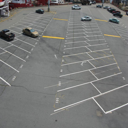

In [36]:
# now we will test the model if he is understands the images if it's empty oroccupied
from PIL import Image

img = Image.open('/content/parking.jpg')
img = img.resize((128, 128))
img

In [37]:
prediction = model.predict(np.array([img]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


In [38]:
T_f =prediction > 0.5
if T_f == True:
  print('it is empty')
  print('Accuarcy =',prediction*100,'%')
else:
  print('it is occupied')
  print('Accuarcy =',(1-prediction)*100,'%')

it is empty
Accuarcy = [[99.99853]] %


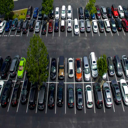

In [39]:
# now we will test the model if he is understands the images if it's empty oroccupied
from PIL import Image

img = Image.open('/content/parking_lot.jpg')
img = img.resize((128, 128))
img

In [40]:
prediction = model.predict(np.array([img]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [41]:
T_f =prediction > 0.5
if T_f == True:
  print('it is empty')
  print('Accuarcy =',prediction*100,'%')
else:
  print('it is occupied')
  print('Accuarcy =',(1-prediction)*100,'%')

it is empty
Accuarcy = [[100.]] %


#It's seemes we should take another pictures and try again to test the #model
#Here it's seems to us the model not understand exactly the images WE should let the model train more of the data
# but we do not have time, the got the idea.


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

<Axes: >

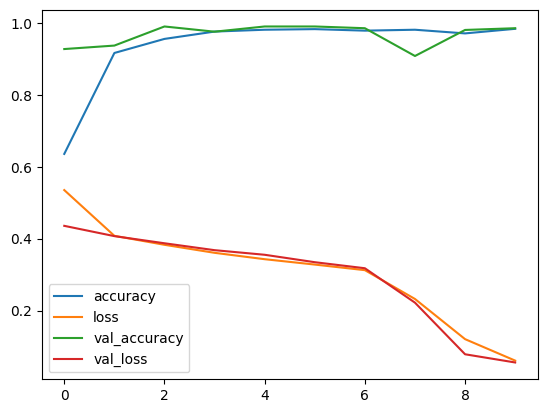

In [18]:
pd.DataFrame(history.history).plot()

<Axes: >

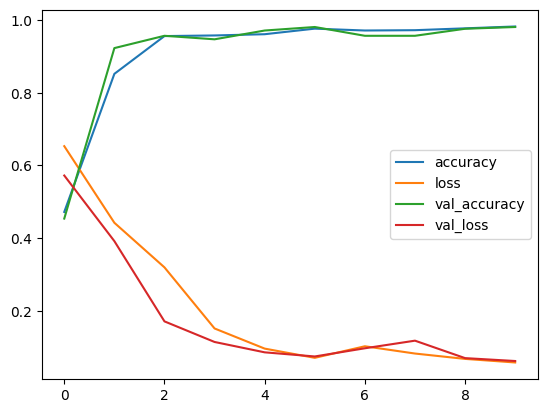

In [42]:
# second way DON't RUN THIS code if you run the above one
pd.DataFrame(history.history).plot()

## Save the Model
Save the trained CNN model for submission.

In [19]:
model.save('my_model_CNN.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:


1- Data Preprocessing = I use resizing images to (64,64), because there is a lot of images have a deffrent size of picture, so it's important to resize all the picture.
normalization: also it's important to normalize the data to enhance model performance, to reduction the dimnsion of the sclae of the data.

2- Model Architecture:  the architecture of your CNN model is having an input lauers, pooling layers
I choose this structure because it's a brilliant architecture as we can see later.
we can expect each layers by truong more than one to see what is the result, and how to avvoid overfitting and underfitting.

3- I choose the activation function of "relu" to input, hiddin layers, since it's take the positive number between 0 and 1
And I choose sigmoid for the output layer, since we have only two classes in our data

4- I choose loss function of "binary_crossentropy" since we have only two classes.and the evaluation metrics for this classification I choose the accuracy.

5-I didn't make any of Regularization Techniques since the model visualization is good.

6- for Model Evaluation  the method I used to evaluate the model performance on the test set is to evaluate (val) of the validation in our data.
i use it because I want to test the model if he is understand what is going on or he is just save hte way in memory.


7- for Model Visualization it's seems the accuracy with the vald_accuracy is good, also with the loss and vald loss.

8- it's seems there is no overfitting or underfitting based on the visualization as i can see.